### CS5691 Assignment 2 - Question 1

##### Submitted by: Vennapareddy Abhigna, Roll Number: ME19B059

#### 1.i - Determine which probabilisitic mixture could have generated this data (It is not a Gaussian mixture). Derive the EM algorithm for your choice of mixture and show your calculations. Write a piece of code to implement the algorithm you derived by setting the number of mixtures K = 4. Plot the log-likelihood (averaged over 100 random initializations) as a function of iterations

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
import random

In [2]:
df=pd.read_csv('A2Q1.csv',header=None)
df.columns=['Data']
shape=df.shape
n=shape[0] #number of data points (rows)
df

,Data
0,0.57539
1,7.69890
2,5.17310
3,1.00350
4,0.21469
...,...
995,39.90800
996,2.77390
997,4.18190
998,63.89000


In [3]:
data = df.to_numpy()
data

array([[5.7539e-01],
       [7.6989e+00],
       [5.1731e+00],
       [1.0035e+00],
       [2.1469e-01],
       [3.2125e+01],
       [9.2702e+00],
       [4.6207e+01],
       [6.5358e-01],
       [1.2001e+00],
       [2.9766e-01],
       [6.2449e-01],
       [9.5808e-01],
       [8.7361e+00],
       [9.2575e-01],
       [2.6319e+00],
       [1.3428e+00],
       [2.6182e+01],
       [4.9103e-01],
       [6.1888e+01],
       [8.6546e-02],
       [2.6722e+00],
       [5.9877e-01],
       [1.6949e+01],
       [8.4124e+00],
       [2.1372e+01],
       [3.0882e-01],
       [2.5290e-01],
       [1.1663e+00],
       [8.2058e-01],
       [1.3311e-01],
       [5.8414e-01],
       [5.1258e+00],
       [3.3799e+00],
       [1.1777e+01],
       [3.6413e+01],
       [3.8200e+00],
       [6.5377e-01],
       [3.3721e+00],
       [3.4539e+01],
       [7.4054e-01],
       [4.2272e-02],
       [7.2729e+00],
       [5.8342e+01],
       [4.1244e+00],
       [8.3717e+00],
       [1.9562e+00],
       [1.462

Text(0.5, 1.0, 'Analysing Data Points distribution')

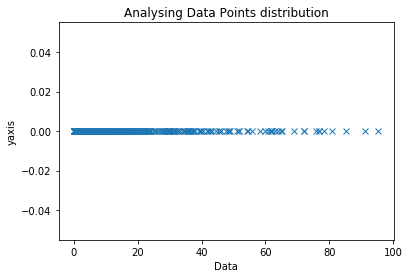

In [4]:
plt.plot(data, len(data) * [0], "x")
plt.xlabel('Data')
plt.ylabel('yaxis')
plt.title('Analysing Data Points distribution')

Text(0.5, 1.0, 'Data Analysis')

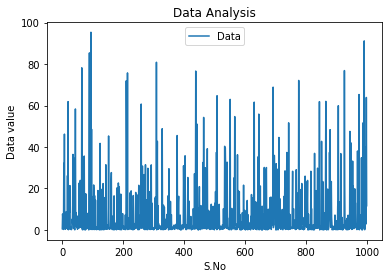

In [5]:
df.plot()
plt.xlabel('S.No')
plt.ylabel('Data value')
plt.title('Data Analysis')

In [6]:
df['yaxis'] = np.zeros(1000)
df

,Data,yaxis
0,0.57539,0.0
1,7.69890,0.0
2,5.17310,0.0
3,1.00350,0.0
4,0.21469,0.0
...,...,...
995,39.90800,0.0
996,2.77390,0.0
997,4.18190,0.0
998,63.89000,0.0


In [7]:
clusters = 4

In [8]:
def assumemean(data,datapointrow):
    mean = []
    mean.append(list(data[datapointrow]))
    for k in range(1,clusters):
        max_d = []
        for i in range(0,len(data)):
            min_d = []
            for j in range(0,len(mean)):
                min_d.append(np.linalg.norm(data[i]-np.array(mean[j])))
            max_d.append(min(min_d))
        mean.append(list(np.array((data[max_d.index(max(max_d))]))))
        
    return mean

In [9]:
def newmean(z,data,clusters):
    mean_new = []
    k=1
    for j in range(clusters):
        sum_data=np.zeros(data.shape[1])
        n=0
        for i in range(len(data)):
            if z[i]==k:
                sum_data=sum_data+data[i]
                n=n+1
        mean_new.append(list(sum_data/n))
        k=k+1
    return mean_new

In [10]:
def cluster(data,mean):
    error=0
    z=[]
    for i in range(len(data)):
        dis = []
        for j in range(len(mean)):
            dis.append((np.linalg.norm(data[i]-np.array(mean[j])))**2)
        z.append(dis.index(min(dis))+1)
        error=error+min(dis)
    return z, error

In [11]:
def final(data,mean):
    errorlist=[]
    z1=cluster(data,mean)[0]
    err=cluster(data,mean)[1]
    errorlist.append(err)
    m=newmean(z1,data,clusters)
    z2=cluster(data,m)[0]
    err=cluster(data,m)[1]
    errorlist.append(err)
    iterations=2
    while (z1!=z2):
        m=newmean(z2,data,clusters)
        z1=z2
        z2=cluster(data,m)[0]
        err=cluster(data,m)[1]
        errorlist.append(err)
        iterations=iterations+1
    number_of_iterations = iterations
    return number_of_iterations,z2,m,errorlist

##### Giving initial parameters for EM by averaging 100 random initialisations (randomly picked points).

In [12]:
ini = 100
m=np.zeros(clusters)
v=np.zeros(clusters)
p=np.zeros(clusters)
for r in range(ini):
    
    means = np.random.choice(df['Data'], size = 4)
    df['cluster_initial'] = cluster(data,means)[0]
  
    values, cluster_counts_gaussian = np.unique(df['cluster_initial'], return_counts = True)
    
    variance_gaussian = []
    pi = []
    for k in range(1,clusters+1):
        sum=0
        for j in range(n):
            if (df['cluster_initial'][j] == k):
                var=(df['Data'][j]- means[k-1])**2
                sum=sum+var
        variance_gaussian.append(sum/cluster_counts_gaussian[k-1])
        pi.append(cluster_counts_gaussian[k-1]/n)

    variance_gaussian = np.array(variance_gaussian)   #variance
    pi = np.array(pi) #pi
    
    asc = np.argsort(means)  
    means = means[asc]
    variance_gaussian = variance_gaussian[asc]
    pi = pi[asc]
    values = values[asc]
    cluster_counts_gaussian = cluster_counts_gaussian[asc]
    m=m+means
    v=v+variance_gaussian
    p=p+pi
avg_means = m/ini
avg_variance = v/ini
avg_pi = p/ini

In [13]:
avg_means

array([ 0.54065757,  1.53686316,  4.8565534 , 19.1411981 ])

In [14]:
avg_variance

array([  0.48677314,   1.35009212,  19.55466106, 445.81733417])

In [15]:
avg_pi

array([0.32904, 0.19205, 0.2119 , 0.26701])

In [16]:
df['cluster_initial'] = cluster(data,avg_means)[0]
df

,Data,yaxis,cluster_initial
0,0.57539,0.0,1
1,7.69890,0.0,3
2,5.17310,0.0,3
3,1.00350,0.0,1
4,0.21469,0.0,1
...,...,...,...
995,39.90800,0.0,4
996,2.77390,0.0,2
997,4.18190,0.0,3
998,63.89000,0.0,4


In [17]:
values, cluster_counts_gaussian = np.unique(df['cluster_initial'], return_counts = True)
values

array([1, 2, 3, 4], dtype=int64)

In [18]:
cluster_counts_gaussian

array([418, 233, 155, 194], dtype=int64)

Text(0.5, 1.0, 'Clusters formed with random initialisation of means averaged over 100 initialisations')

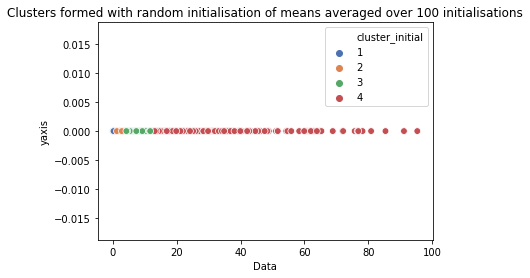

In [19]:
sns.scatterplot(data=df, x = 'Data',y = 'yaxis', s = 45, hue = 'cluster_initial', palette="deep")
plt.title('Clusters formed with random initialisation of means averaged over 100 initialisations')

In [20]:
data1 = data.flatten()
asd = np.argsort(data1)  
data1=data1[asd]
zvalues = df['cluster_initial'].to_numpy()
zvalues = zvalues[asd]
df1=df

### Exponential Distribution

In [21]:
yv_exp_p = np.zeros(n)
for j in range(n):
    su = 0
    for k in range(1,clusters+1):
        su = su + avg_pi[k-1]*((math.exp(-data1[j]/avg_means[k-1]))/avg_means[k-1])            
    yv_exp_p[j]=su

Text(0.5, 1.0, 'Exponential Probability Distribution')

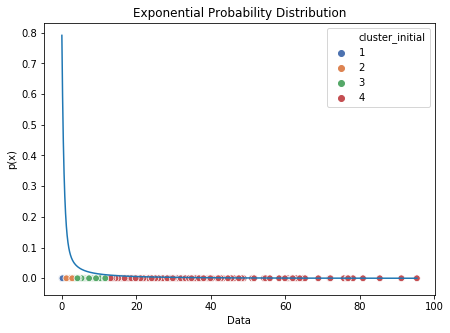

In [22]:
f = plt.figure()
f.set_figwidth(7)
f.set_figheight(5)
sns.scatterplot(data=df, x = 'Data',y = 'yaxis', s = 45, hue = 'cluster_initial', palette="deep")
plt.plot(data1,yv_exp_p)
plt.ylabel('p(x)')
plt.title('Exponential Probability Distribution')

In [23]:
yv_exp = np.zeros(n)
for j in range(n):
    for k in range(1,clusters+1):
        if (zvalues[j] == k):
            yv_exp[j]=(math.exp(-data1[j]/avg_means[k-1]))/avg_means[k-1]

Text(0.5, 1.0, 'Exponential Distribution')

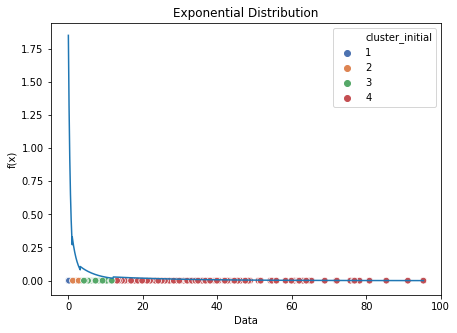

In [24]:
f = plt.figure()
f.set_figwidth(7)
f.set_figheight(5)
sns.scatterplot(data=df, x = 'Data',y = 'yaxis', s = 45, hue = 'cluster_initial', palette="deep")
plt.plot(data1,yv_exp)
plt.ylabel('f(x)')
plt.title('Exponential Distribution')

In [25]:
def log_Likelihood_exp(data_array, mean, pi_array):
    Le = 0
    for i in range(len(data_array)):
        su_e= 0
        for k in range(clusters):
            num_e = pi_array[k]*math.exp(-(data_array[i]/mean[k]))
            den_e = mean[k]
            su_e = su_e + num_e/den_e
        Le = Le + math.log(su_e)
    return Le

In [26]:
log_like_exp = log_Likelihood_exp(df['Data'], avg_means, avg_pi)
log_like_exp

-2582.0518531929742

In [27]:
def lambda_ik_exp(data_array, thet):
    mean = thet[0]
    pi_array = thet[1]
    lamb = np.empty([clusters,len(data_array)])
    for i in range(len(data_array)):
        deno = 0
        for k in range(clusters):
            nume = (pi_array[k]*math.exp(-data_array[i]/mean[k]))/mean[k]
            deno = deno + nume
            lamb[k][i] = nume
        for k in range(clusters):
            lamb[k][i] = lamb[k][i]/deno
    return lamb

In [28]:
def theta_exp(data_array, lambd):
    mean_theta = np.empty([clusters])
    pi_theta = np.empty([clusters])
    for k in range(clusters):
        num = 0
        nums = 0
        den = 0
        for i in range(len(data_array)):
            den = den + lambd[k][i]*data_array[i]
            num = num + lambd[k][i]
        mean_theta[k] = den/num
        pi_theta[k] = num/len(data_array)
        theta_t1 = np.array([mean_theta, pi_theta])
    return theta_t1

In [29]:
iterations_exp = 1
log_likeli_exp = []
e_exp = 0.0001
theta_t_exp = np.array([avg_means, avg_pi])
lk_exp = log_Likelihood_exp(df['Data'], theta_t_exp[0], theta_t_exp[1])
log_likeli_exp.append(lk_exp)


lamb_t1_exp = lambda_ik_exp(data, theta_t_exp)
theta_t1_exp = theta_exp(data, lamb_t1_exp)
log_likeli_exp.append(log_Likelihood_exp(df['Data'], theta_t1_exp[0], theta_t1_exp[1]))


while (min(pow(np.sum((theta_t_exp-theta_t1_exp)**2, axis=1),1/2)) > e_exp ):
    iterations_exp = iterations_exp + 1
    theta_t_exp = theta_t1_exp
    lamb_t1_exp = lambda_ik_exp(data, theta_t_exp)
    theta_t1_exp = theta_exp(data, lamb_t1_exp)
    log_likeli_exp.append(log_Likelihood_exp(df['Data'], theta_t1_exp[0], theta_t1_exp[1]))
iterations_exp

202

Text(0, 0.5, 'log_likelihood')

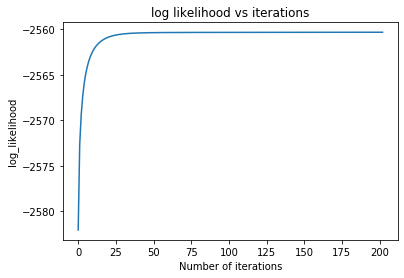

In [30]:
it_exp = [j for j in range(iterations_exp+1)]
plt.plot(it_exp,log_likeli_exp)
plt.title('log likelihood vs iterations')
plt.xlabel('Number of iterations')
plt.ylabel('log_likelihood')

In [31]:
df1['cluster_exp'] = cluster(data,theta_t1_exp[0])[0]
zvalues_exp1 = df1['cluster_exp'].to_numpy()
zvalues_exp1 = zvalues_exp1[asd]

In [32]:
yv_exp1_p = np.zeros(n)
for j in range(n):
    su=0
    for k in range(1,clusters+1):
        su = su + theta_t1_exp[1][k-1]*((math.exp(-data1[j]/theta_t1_exp[0][k-1]))/theta_t1_exp[0][k-1])
    yv_exp1_p[j] = su

Text(0.5, 1.0, 'Exponential Probability Distribution after EM')

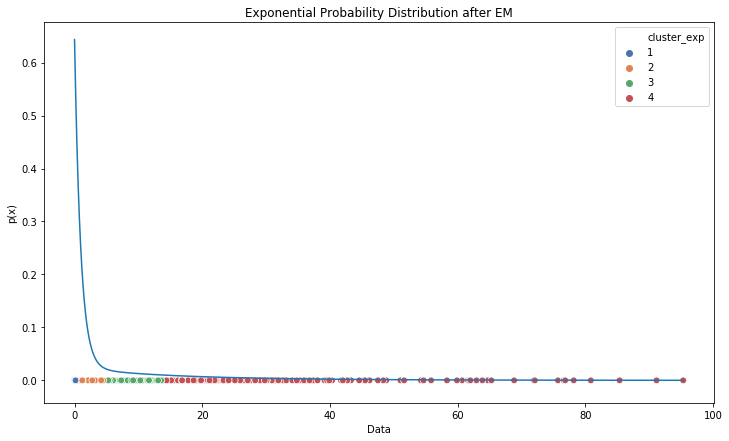

In [33]:
f1 = plt.figure()
f1.set_figwidth(12)
f1.set_figheight(7)
sns.scatterplot(data=df1, x = 'Data',y = 'yaxis', s = 45, hue = 'cluster_exp', palette="deep")
plt.plot(data1,yv_exp1_p)
plt.ylabel('p(x)')
plt.title('Exponential Probability Distribution after EM')

In [34]:
yv_exp1 = np.zeros(n)
for j in range(n):
    for k in range(1,clusters+1):
        if (zvalues_exp1[j] == k):
            yv_exp1[j]=(math.exp(-data1[j]/theta_t1_exp[0][k-1]))/theta_t1_exp[0][k-1]

Text(0.5, 1.0, 'Exponential Distribution after EM')

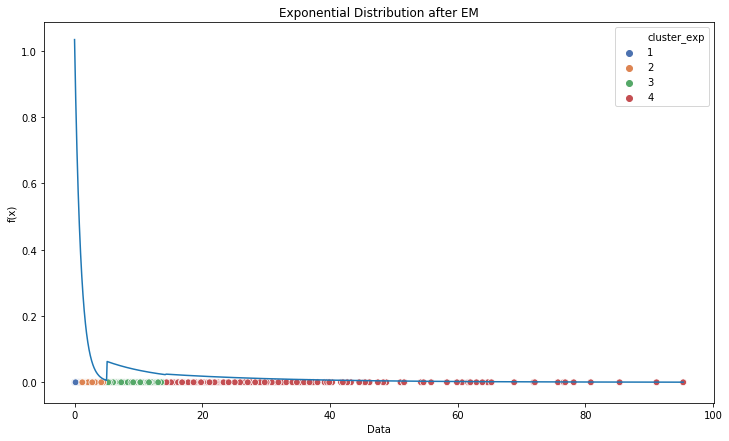

In [35]:
f1 = plt.figure()
f1.set_figwidth(12)
f1.set_figheight(7)
sns.scatterplot(data=df1, x = 'Data',y = 'yaxis', s = 45, hue = 'cluster_exp', palette="deep")
plt.plot(data1,yv_exp1)
plt.ylabel('f(x)')
plt.title('Exponential Distribution after EM')

#### 1.ii - Assume that the same data was infact generated from a mixture of Gaussians with 4 mixtures. Implement the EM algorithm and plot the log-likelihood (averaged over 100 random initializations of the parameters) as a function of iterations. How does the plot compare with the plot from part (i)? Provide insights that you draw from this experiment.


### Gaussian Distribution

In [36]:
yv_p = np.zeros(n)
for j in range(n):
    su = 0
    for k in range(1,clusters+1):
        su = su + avg_pi[k-1]*(math.exp(-(pow(data1[j]-avg_means[k-1],2))/(2*avg_variance[k-1]))/(pow(2*math.pi*avg_variance[k-1],1/2)))
    yv_p[j]= su

Text(0.5, 1.0, 'Gaussian Probability Distribution')

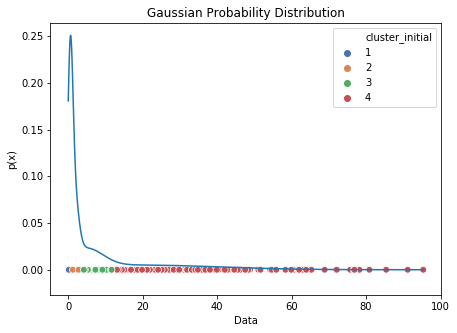

In [37]:
f1 = plt.figure()
f1.set_figwidth(7)
f1.set_figheight(5)
sns.scatterplot(data=df, x = 'Data',y = 'yaxis', s = 45, hue = 'cluster_initial', palette="deep")
plt.plot(data1,yv_p)
plt.ylabel('p(x)')
plt.title('Gaussian Probability Distribution')

In [38]:
yv = np.zeros(n)
for j in range(n):
    for k in range(1,clusters+1):
        if (zvalues[j] == k):
            yv[j]=math.exp(-(pow(data1[j]-avg_means[k-1],2))/(2*avg_variance[k-1]))/(pow(2*math.pi*avg_variance[k-1],1/2))

Text(0.5, 1.0, 'Gaussian Distribution')

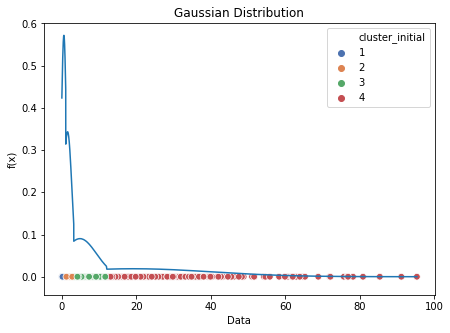

In [39]:
f1 = plt.figure()
f1.set_figwidth(7)
f1.set_figheight(5)
sns.scatterplot(data=df, x = 'Data',y = 'yaxis', s = 45, hue = 'cluster_initial', palette="deep")
plt.plot(data1,yv)
plt.ylabel('f(x)')
plt.title('Gaussian Distribution')

In [40]:
def log_Likelihood(data_array, mean, variance, pi_array):
    L = 0
    for i in range(len(data_array)):
        su = 0
        for k in range(clusters):
            num = pi_array[k]*math.exp(-(pow(data_array[i]-mean[k],2))/(2*variance[k]))
            den = pow(2*math.pi*variance[k],1/2)
            su = su + num/den
        L = L + math.log(su)
    return L

In [41]:
log_like = log_Likelihood(df['Data'], avg_means, avg_variance, avg_pi)
log_like

-2809.1896358943545

In [42]:
def lambda_ik(data_array, thet):
    mean = thet[0]
    variance = thet[1]
    pi_array = thet[2]
    lamb = np.empty([clusters,len(data_array)])
    for i in range(len(data_array)):
        deno = 0
        for k in range(clusters):
            nume = (pi_array[k]*math.exp(-(pow(data_array[i]-mean[k],2))/(2*variance[k])))/(pow(2*math.pi*variance[k],1/2))
            deno = deno + nume
            lamb[k][i] = nume
        for k in range(clusters):
            lamb[k][i] = lamb[k][i]/deno
    return lamb

In [43]:
def theta(data_array, lambd):
    mean_theta = np.empty([clusters])
    pi_theta = np.empty([clusters])
    variance_theta = np.empty([clusters])
    for k in range(clusters):
        num = 0
        nums = 0
        den = 0
        for i in range(len(data_array)):
            num = num + lambd[k][i]*data_array[i]
            den = den + lambd[k][i]
        mean_theta[k] = num/den
        pi_theta[k] = den/len(data_array)
        for i in range(len(data_array)):
            nums = nums + lambd[k][i]*((data_array[i]-mean_theta[k])**2)
        variance_theta[k] = nums/den
        theta_t1 = np.array([mean_theta, variance_theta, pi_theta])
    return theta_t1

In [44]:
iterations = 1
log_likeli = []
e = 0.0001
theta_t = np.array([avg_means, avg_variance, avg_pi])
lk = log_Likelihood(df['Data'], theta_t[0], theta_t[1], theta_t[2])
log_likeli.append(lk)


lamb_t1 = lambda_ik(data, theta_t)
theta_t1 = theta(data, lamb_t1)
log_likeli.append(log_Likelihood(df['Data'], theta_t1[0], theta_t1[1], theta_t1[2]))


while (min(pow(np.sum((theta_t-theta_t1)**2, axis=1),1/2)) > e ):
    iterations = iterations + 1
    theta_t = theta_t1
    lamb_t1 = lambda_ik(data, theta_t)
    theta_t1 = theta(data, lamb_t1)
    log_likeli.append(log_Likelihood(df['Data'], theta_t1[0], theta_t1[1], theta_t1[2]))
iterations

41

Text(0, 0.5, 'log_likelihood')

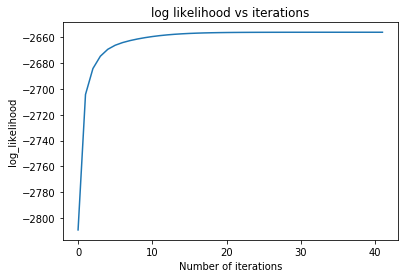

In [45]:
it = [j for j in range(iterations+1)]
plt.plot(it,log_likeli)
plt.title('log likelihood vs iterations')
plt.xlabel('Number of iterations')
plt.ylabel('log_likelihood')

In [46]:
df1['cluster'] = cluster(data,theta_t1[0])[0]
zvalues_ga1 = df1['cluster'].to_numpy()
zvalues_ga1 = zvalues_ga1[asd]

In [47]:
yv1_p = np.zeros(n)
for j in range(n):
    su = 0
    for k in range(1,clusters+1):
        su = su + theta_t1[2][k-1]*(math.exp(-(pow(data1[j]-theta_t1[0][k-1],2))/(2*theta_t1[1][k-1]))/(pow(2*math.pi*theta_t1[1][k-1],1/2)))
    yv1_p[j]=su

Text(0.5, 1.0, 'Gaussian Probability Distribution after EM')

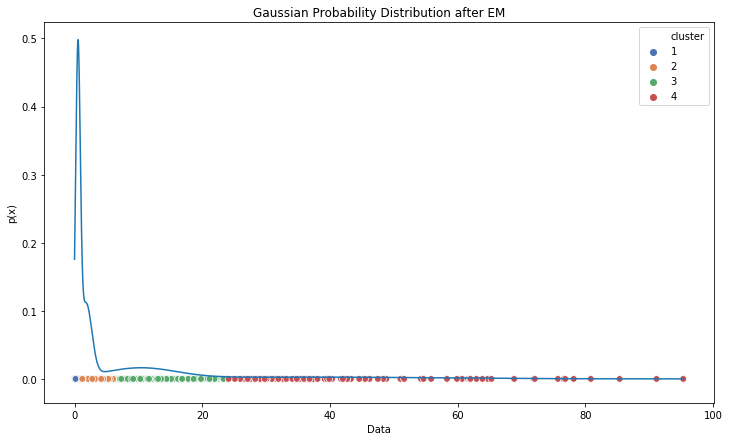

In [48]:
f1 = plt.figure()
f1.set_figwidth(12)
f1.set_figheight(7)
sns.scatterplot(data=df1, x = 'Data',y = 'yaxis', s = 45, hue = 'cluster', palette="deep")
plt.plot(data1,yv1_p)
plt.ylabel('p(x)')
plt.title('Gaussian Probability Distribution after EM')

In [49]:
yv1 = np.zeros(n)
for j in range(n):
    for k in range(1,clusters+1):
        if (zvalues_ga1[j] == k):
            yv1[j]=math.exp(-(pow(data1[j]-theta_t1[0][k-1],2))/(2*theta_t1[1][k-1]))/(pow(2*math.pi*theta_t1[1][k-1],1/2))

Text(0.5, 1.0, 'Gaussian Distribution after EM')

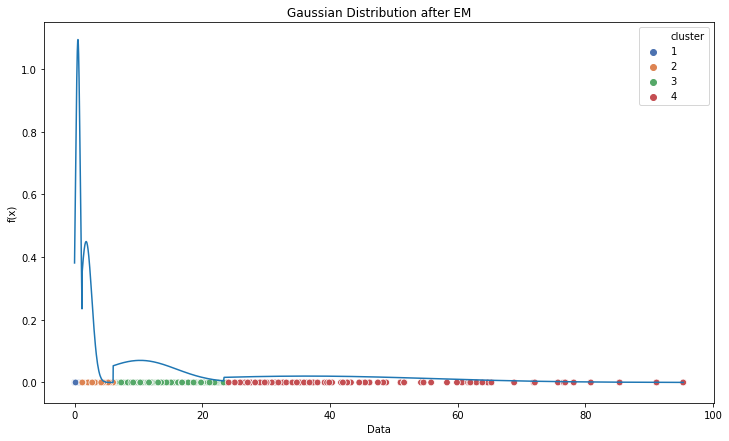

In [50]:
f1 = plt.figure()
f1.set_figwidth(12)
f1.set_figheight(7)
sns.scatterplot(data=df, x = 'Data',y = 'yaxis', s = 45, hue = 'cluster', palette="deep")
plt.plot(data1,yv1)
plt.ylabel('f(x)')
plt.title('Gaussian Distribution after EM')

#### 1.iii - Run the K-means algorithm with K = 4 on the same data. Plot the objective of K − means as a function of iterations.

In [51]:
first_mean_k = assumemean(data,199)
first_mean_k

[[1.2941], [95.346], [48.363], [71.925]]

In [52]:
z_final_k = final(data,first_mean_k)[1]
means_k = np.array(final(data,first_mean_k)[2]).flatten()
error_list_k = final(data,first_mean_k)[3]
means_k

array([ 1.72009404, 68.84516   , 16.20715899, 36.41782812])

In [53]:
df['cluster_kmeans'] = z_final_k
df

,Data,yaxis,cluster_initial,cluster_exp,cluster,cluster_kmeans
0,0.57539,0.0,1,1,1,1
1,7.69890,0.0,3,3,3,1
2,5.17310,0.0,3,3,2,1
3,1.00350,0.0,1,2,1,1
4,0.21469,0.0,1,1,1,1
...,...,...,...,...,...,...
995,39.90800,0.0,4,4,4,4
996,2.77390,0.0,2,2,2,1
997,4.18190,0.0,3,2,2,1
998,63.89000,0.0,4,4,4,2


Text(0.5, 1.0, 'Clusters formed by kmeans')

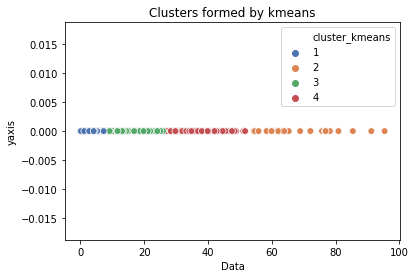

In [54]:
sns.scatterplot(data=df, x = 'Data',y = 'yaxis', s = 45, hue = 'cluster_kmeans', palette="deep")
plt.title('Clusters formed by kmeans')

Text(0, 0.5, 'Error')

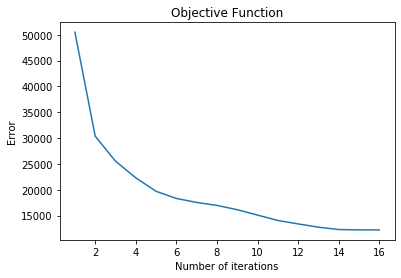

In [55]:
it1 = [j for j in range(1,len(error_list_k)+1)]
plt.plot(it1,error_list_k)
plt.title('Objective Function')
plt.xlabel('Number of iterations')
plt.ylabel('Error')